### Machine Learning Algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('preprocessing_data.csv')
data.head()

,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area
0,185000.0,2023-10-13,Terraced,3,1,Freehold,"['Oil Central Heating', 'Freehold Semi-Detache...",Spacious 3 Bedroom Semi-Detached property situ...,NaN,"Penllwyn Estate, Capel Bangor, Aberystwyth","M S PROPERTIES (UK) LIMITED, Aberystwyth","23 Chalybeate Street,\r\nAberystwyth,\r\nSY23 1HX",https://www.rightmove.co.uk/properties/8664108...,Mid Wales,Ceredigion
1,875000.0,2023-06-16,Detached,5,3,Freehold,"['** Iconic Victorian residence **', '** 5 Bed...",** Fully refurbished Victorian town house ** H...,Band: C,"Llanbadarn Road, Llanbadarn Fawr, Aberystwyth,...","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1315985...,Mid Wales,Ceredigion
2,875000.0,2022-06-01,Detached,10,6,Freehold,"['EPC: E', 'Council Tax Band: F', 'Broadband-...","Windrush House, dating back to 1872, has under...",Band: F,"Windrush, Llanrhystud, Ceredigion.","Fine and Country West Wales, Aberystwyth",The Gallery\r\nStation Approach\r\nAlexandra R...,https://www.rightmove.co.uk/properties/8539838...,Mid Wales,Ceredigion
3,860000.0,2023-08-01,Detached,6,1,Freehold,['Handsome country house. Wealth of character ...,Handsome late Georgian country house enjoying ...,Band: G,"Llanilar, Aberystwyth, Ceredigion, SY23","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1238905...,Mid Wales,Ceredigion
4,835000.0,2023-01-04,Detached,5,6,Freehold,['** Nothing Compares - Exclusive Seaside Prop...,Nothing Compares ! An exclusive seaside proper...,NaN,"Lewis Terrace, New Quay , SA45","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1378149...,Mid Wales,Ceredigion


In [3]:
data_new = data.drop(['date','key_features','description_text','address','agent_name','agent_address','url'], axis=1)
data_new.head()

,price,property_type,bedrooms,bathrooms,tenure,council_tax,part,area
0,185000.0,Terraced,3,1,Freehold,NaN,Mid Wales,Ceredigion
1,875000.0,Detached,5,3,Freehold,Band: C,Mid Wales,Ceredigion
2,875000.0,Detached,10,6,Freehold,Band: F,Mid Wales,Ceredigion
3,860000.0,Detached,6,1,Freehold,Band: G,Mid Wales,Ceredigion
4,835000.0,Detached,5,6,Freehold,NaN,Mid Wales,Ceredigion


#### LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [6]:
# List of column names to label encode
columns_to_encode = ['property_type', 'tenure', 'council_tax', 'part', 'area']

# Create a dictionary to store the encoders
encoders = {}

# Initialize and fit the encoders for each specified column
for column in columns_to_encode:
    encoder = LabelEncoder()
    data_new[column] = encoder.fit_transform(data_new[column])
    encoders[column] = encoder

In [7]:
data_new.head()

,price,property_type,bedrooms,bathrooms,tenure,council_tax,part,area
0,185000.0,34,3,1,3,9,0,5
1,875000.0,11,5,3,3,2,0,5
2,875000.0,11,10,6,3,5,0,5
3,860000.0,11,6,1,3,6,0,5
4,835000.0,11,5,6,3,9,0,5


#### Correlation

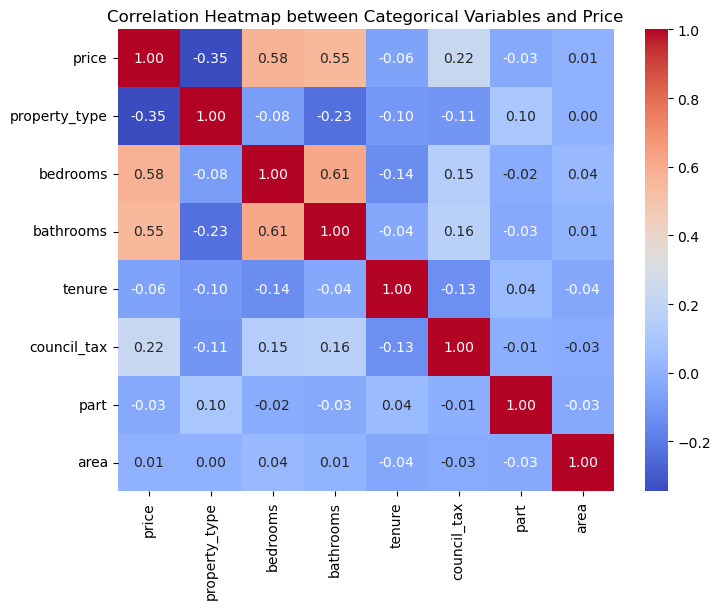

In [8]:

# columns
selected_columns = ['price','property_type', 'bedrooms', 'bathrooms', 'tenure', 'council_tax', 'part', 'area']

# Calculate Cramér's V
corr_matrix = data_new[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Categorical Variables and Price')
plt.show()


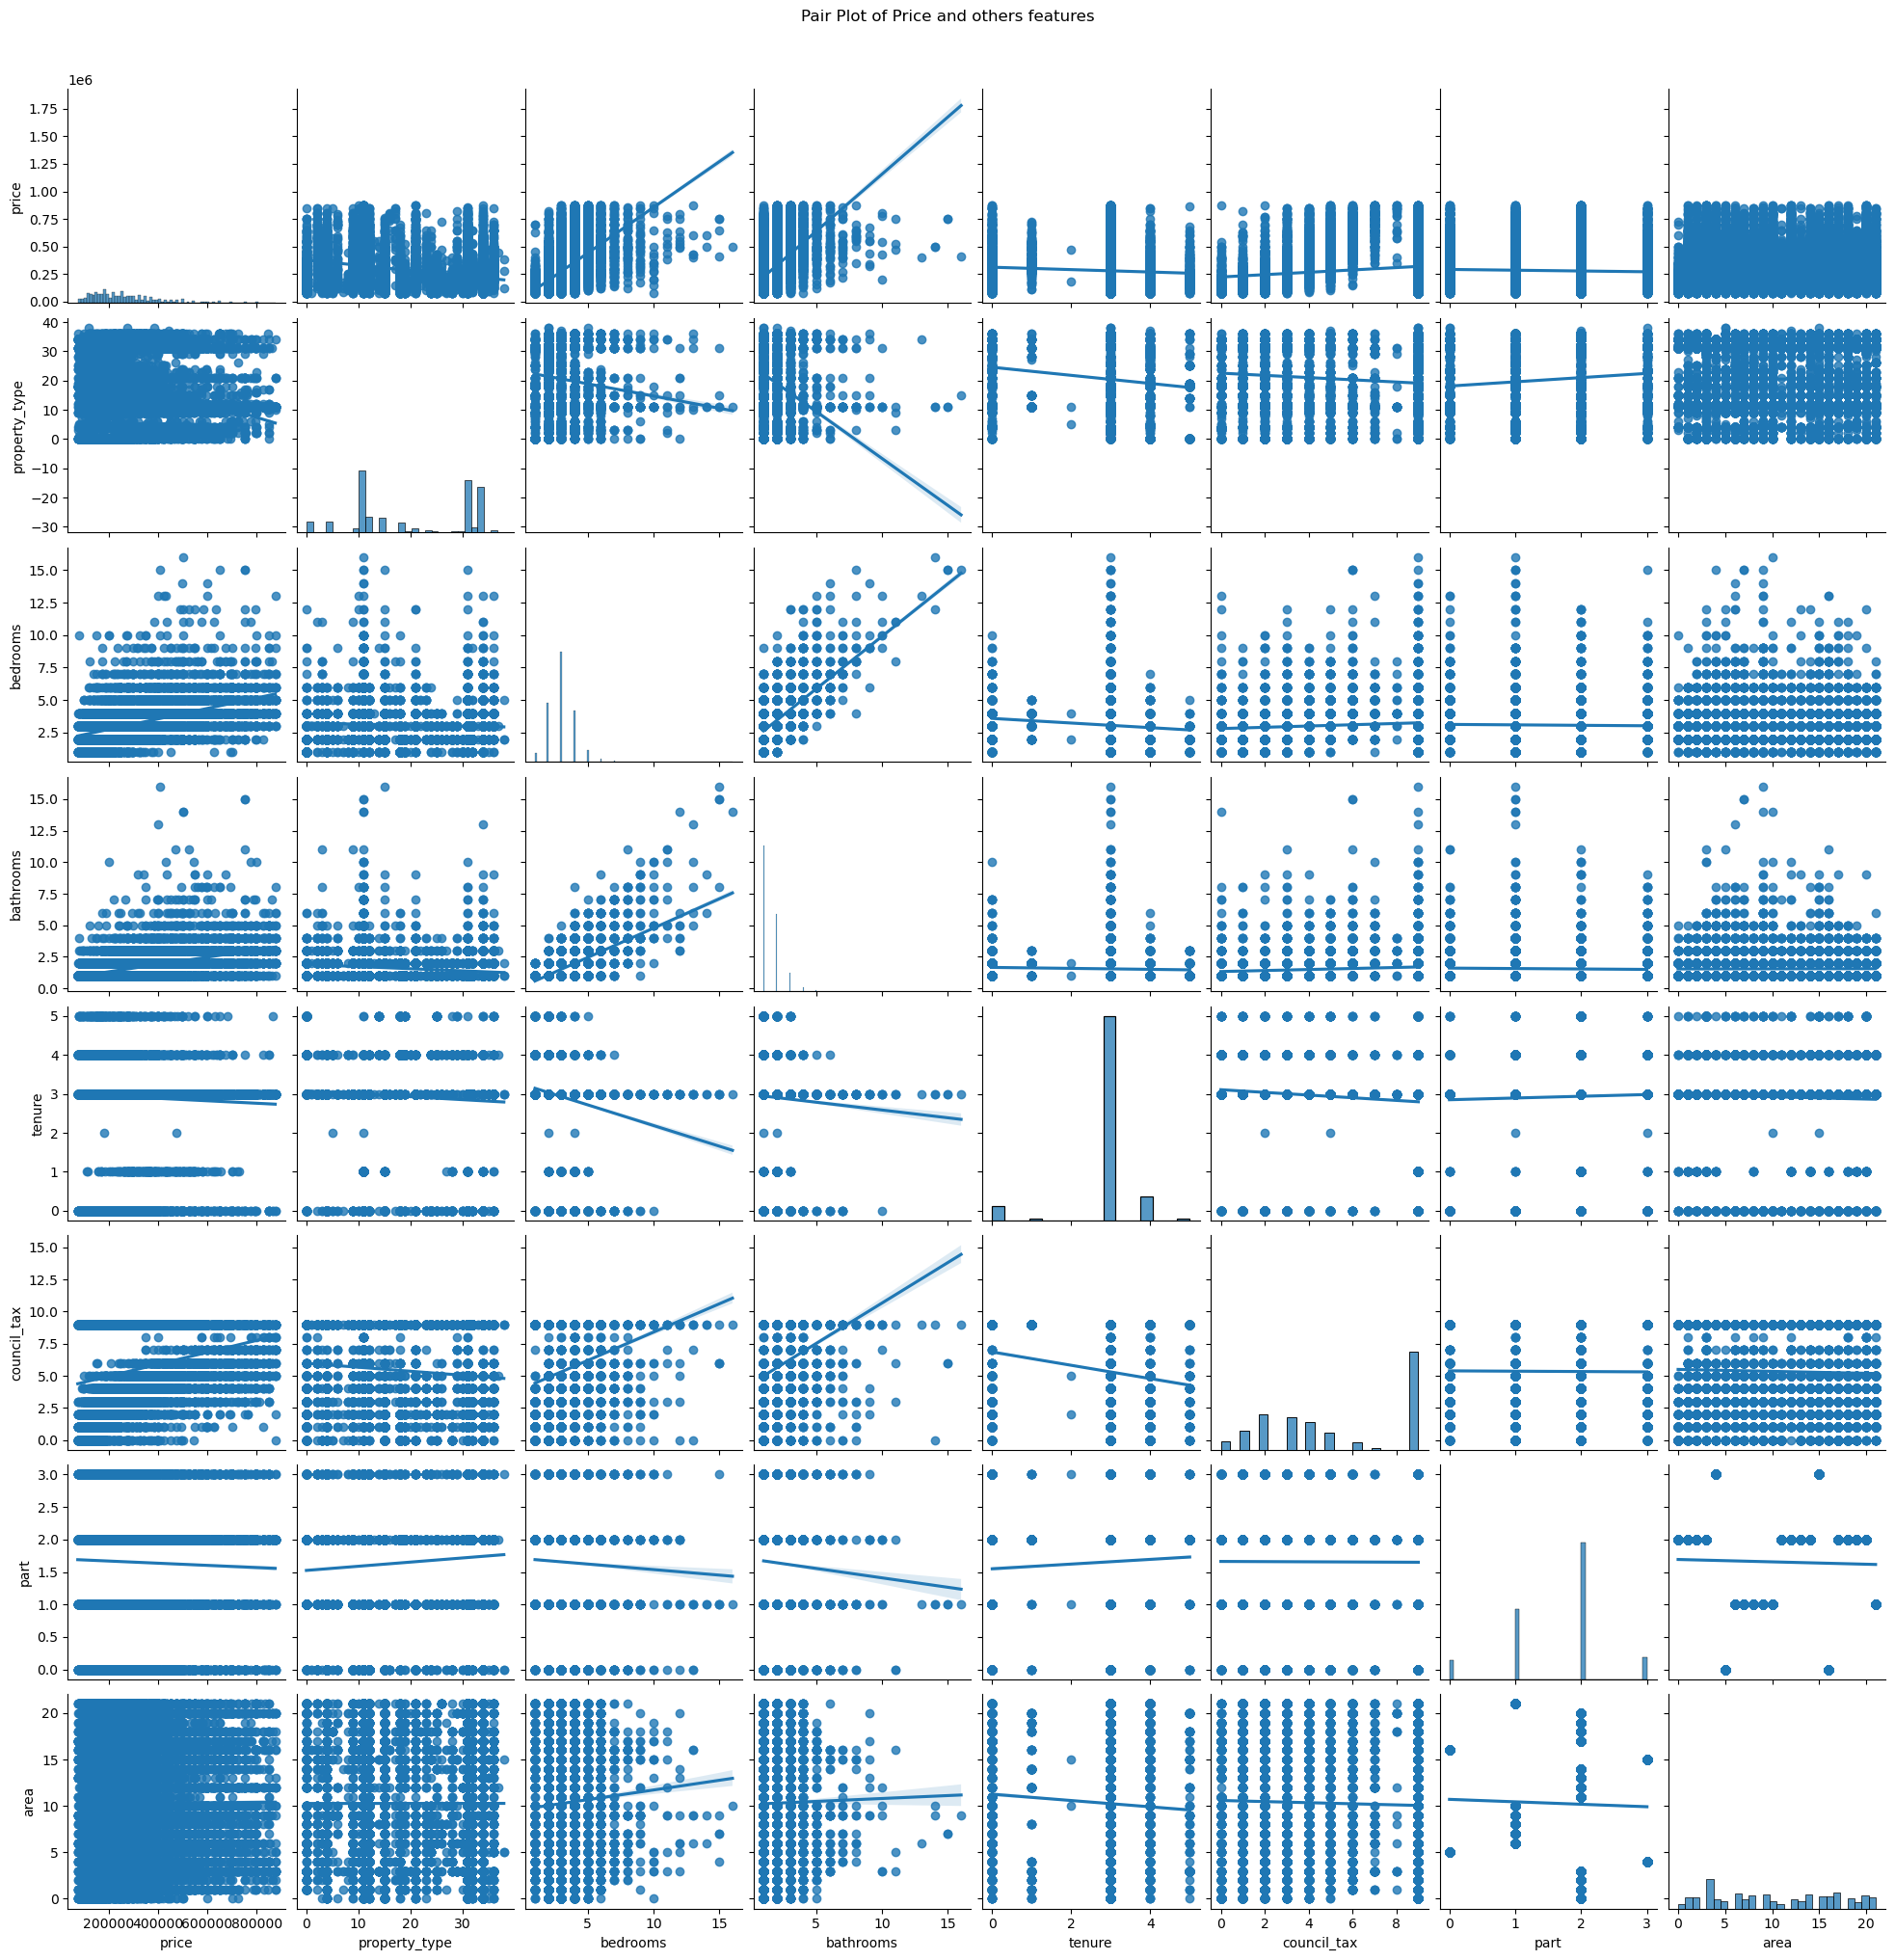

In [9]:
data_subset = data_new[['price', 'property_type', 'bedrooms', 'bathrooms', 'tenure', 'council_tax', 'part', 'area']]
pair_plot = sns.pairplot(data_subset, kind='reg')
pair_plot.fig.suptitle("Pair Plot of Price and others features", y=1.02)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X = data_new.drop('price', axis=1)
y = data_new['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### 1. Linear Regression model

In [13]:
# Create an linear regression model
lr_model = LinearRegression()
# train model
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
yhat_train = lr_model.predict(X_train)
yhat_test = lr_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats.stats import pearsonr

print('Train dataset R-square:', lr_model.score(X_train,y_train))
print('Test dataset R-square:', lr_model.score(X_test,y_test))

Train dataset R-square: 0.46535028687531155
Test dataset R-square: 0.47149577218088623


In [16]:
print('Train dataset MSE:', mean_squared_error(y_train, yhat_train))
print('Test dataset MSE:', mean_squared_error(y_test,yhat_test))
print('Train dataset MAE:', mean_absolute_error(y_train, yhat_train))
print('Test dataset MAE:', mean_absolute_error(y_test,yhat_test))

Train dataset MSE: 12679063030.377888
Test dataset MSE: 12254871780.314688
Train dataset MAE: 81116.95207007445
Test dataset MAE: 79006.68488187481


In [17]:
pearsonr(yhat_test,y_test)

PearsonRResult(statistic=0.6868300587167251, pvalue=0.0)

In [18]:
residuals = y_test - yhat_test
std_deviation = np.std(residuals)
std_deviation

110689.47224787797

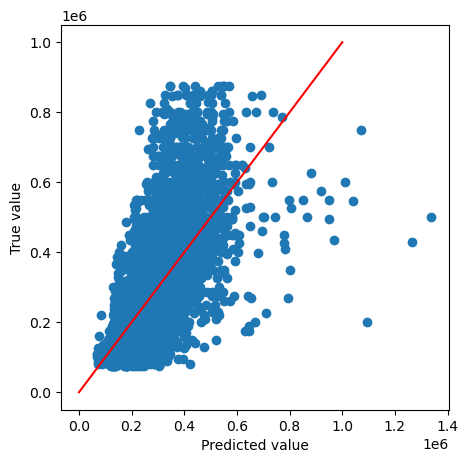

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(yhat_test, y_test)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.plot([11,1000000], [11,1000000], 'k-', color='r')
plt.show()

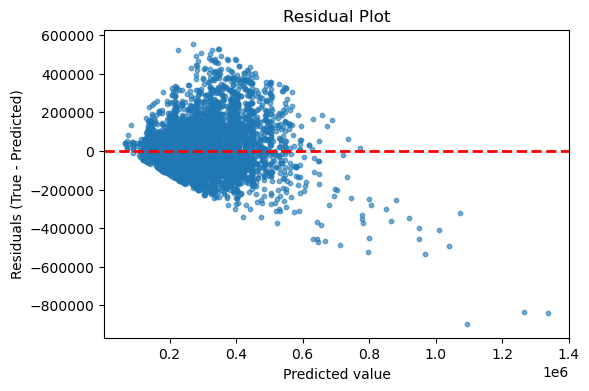

In [20]:
# Calculate residuals
residuals = y_test - yhat_test

# Create a residual plot
plt.figure(figsize=(6, 4))
plt.scatter(yhat_test, residuals, s=10, alpha=0.6)
plt.xlabel('Predicted value')
plt.ylabel('Residuals (True - Predicted)')
plt.axhline(0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')

plt.show()

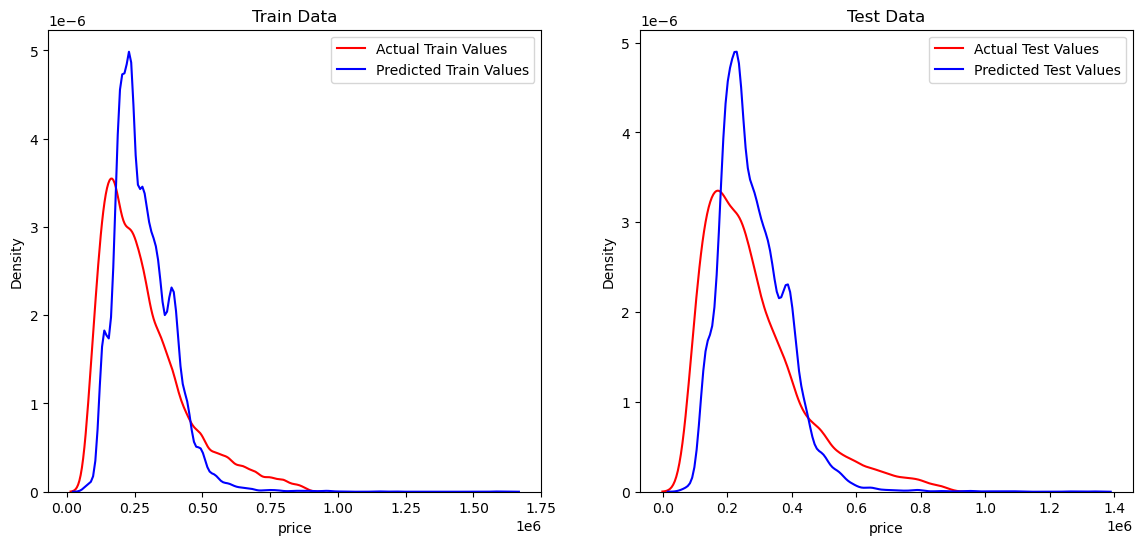

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(yhat_train, hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)
ax1.set_title('Train Data')
ax1.legend()

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(yhat_test, hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)
ax2.set_title('Test Data')
ax2.legend()

plt.show()

#### 2. Decision tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


# Create a decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [23]:
yhat_train = tree_model.predict(X_train)
yhat_test = tree_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats.stats import pearsonr

print('Train dataset R-square:', tree_model.score(X_train,y_train))
print('Test dataset R-square:', tree_model.score(X_test,y_test))

Train dataset R-square: 0.8429954842836423
Test dataset R-square: 0.6209009146310907


In [25]:
print('Train dataset MSE:', mean_squared_error(y_train, yhat_train))
print('Test dataset MSE:', mean_squared_error(y_test,yhat_test))
print('Train dataset MAE:', mean_absolute_error(y_train, yhat_train))
print('Test dataset MAE:', mean_absolute_error(y_test,yhat_test))

Train dataset MSE: 3723316597.6793475
Test dataset MSE: 8790489155.406784
Train dataset MAE: 36886.995051959995
Test dataset MAE: 61546.185045180406


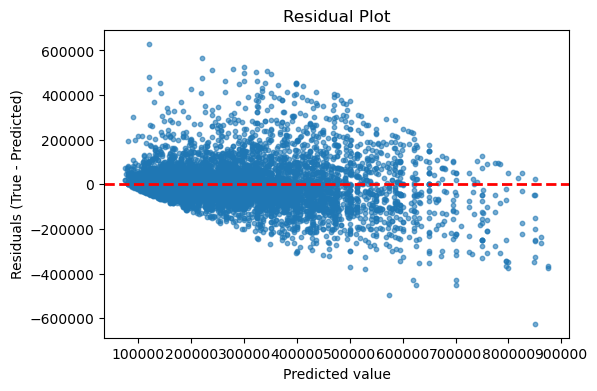

In [26]:
# Calculate residuals
residuals = y_test - yhat_test

# Create a residual plot
plt.figure(figsize=(6, 4))
plt.scatter(yhat_test, residuals, s=10, alpha=0.6)
plt.xlabel('Predicted value')
plt.ylabel('Residuals (True - Predicted)')
plt.axhline(0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')

plt.show()

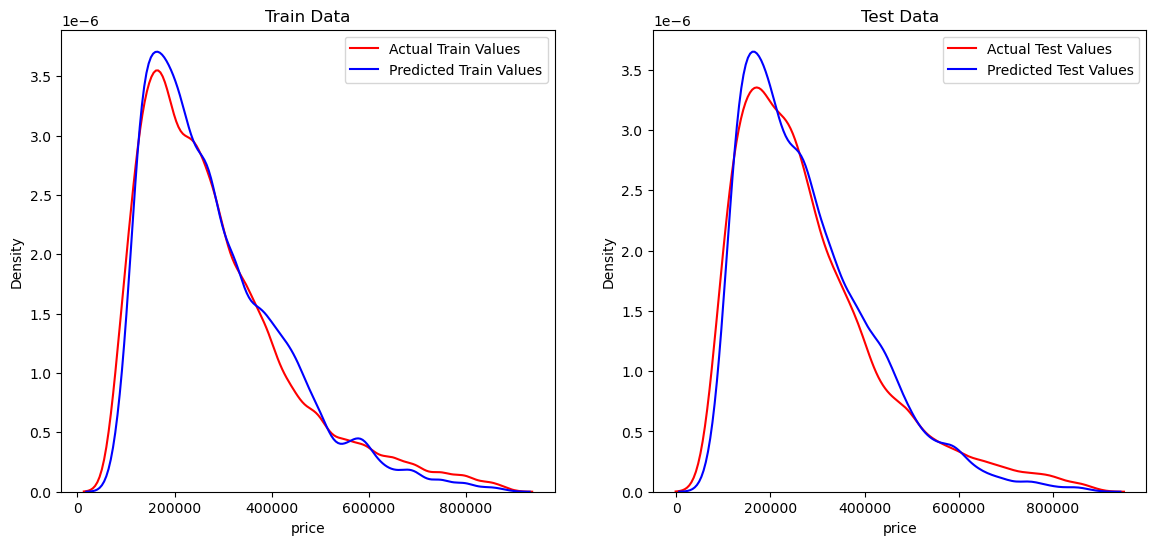

In [27]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(yhat_train, hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)
ax1.set_title('Train Data')
ax1.legend()

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(yhat_test, hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)
ax2.set_title('Test Data')
ax2.legend()

plt.show()

#### 3. Random forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
yhat_train = rf_model.predict(X_train)
yhat_test = rf_model.predict(X_test)

In [30]:
print('Train dataset R-square:', rf_model.score(X_train,y_train))
print('Test dataset R-square:', rf_model.score(X_test,y_test))

Train dataset R-square: 0.8290786898432863
Test dataset R-square: 0.675939729613658


In [31]:
print('Train dataset MSE:', mean_squared_error(y_train, yhat_train))
print('Test dataset MSE:', mean_squared_error(y_test,yhat_test))
print('Train dataset MAE:', mean_absolute_error(y_train, yhat_train))
print('Test dataset MAE:', mean_absolute_error(y_test,yhat_test))

Train dataset MSE: 4053349345.399042
Test dataset MSE: 7514257887.900863
Train dataset MAE: 42325.612929942035
Test dataset MAE: 58046.09828055524


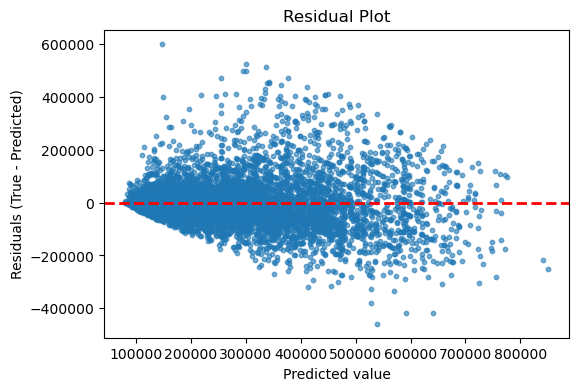

In [32]:
# Calculate residuals
residuals = y_test - yhat_test

# Create a residual plot
plt.figure(figsize=(6, 4))
plt.scatter(yhat_test, residuals, s=10, alpha=0.6)
plt.xlabel('Predicted value')
plt.ylabel('Residuals (True - Predicted)')
plt.axhline(0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')

plt.show()

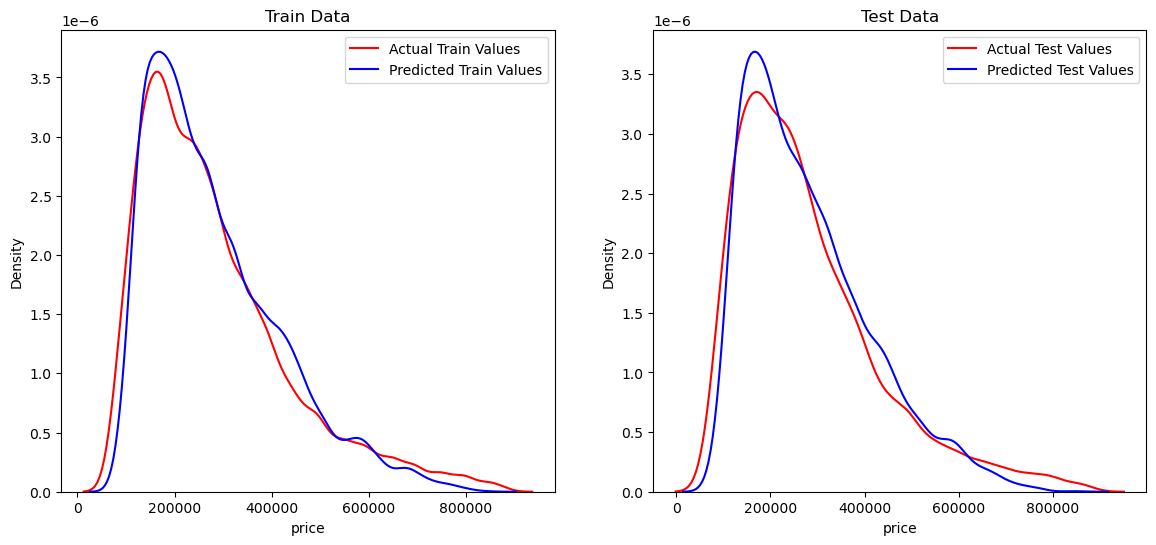

In [33]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(yhat_train, hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)
ax1.set_title('Train Data')
ax1.legend()

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(yhat_test, hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)
ax2.set_title('Test Data')
ax2.legend()

plt.show()

#### 4. Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=5, random_state=42)

In [35]:
yhat_train = gb_model.predict(X_train)
yhat_test = gb_model.predict(X_test)

In [36]:
print('Train dataset R-square:', gb_model.score(X_train,y_train))
print('Test dataset R-square:', gb_model.score(X_test,y_test))

Train dataset R-square: 0.7306706446879792
Test dataset R-square: 0.7059204235047063


In [37]:
print('Train dataset MSE:', mean_squared_error(y_train, yhat_train))
print('Test dataset MSE:', mean_squared_error(y_test,yhat_test))
print('Train dataset MAE:', mean_absolute_error(y_train, yhat_train))
print('Test dataset MAE:', mean_absolute_error(y_test,yhat_test))

Train dataset MSE: 6387067622.22794
Test dataset MSE: 6819070337.489421
Train dataset MAE: 54953.556087445184
Test dataset MAE: 55780.49192332933


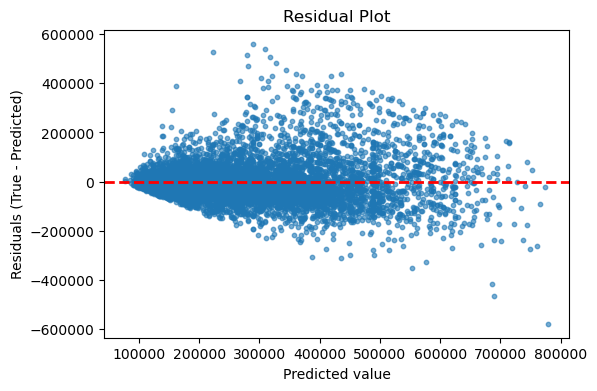

In [38]:
# Calculate residuals
residuals = y_test - yhat_test

# Create a residual plot
plt.figure(figsize=(6, 4))
plt.scatter(yhat_test, residuals, s=10, alpha=0.6)
plt.xlabel('Predicted value')
plt.ylabel('Residuals (True - Predicted)')
plt.axhline(0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')

plt.show()

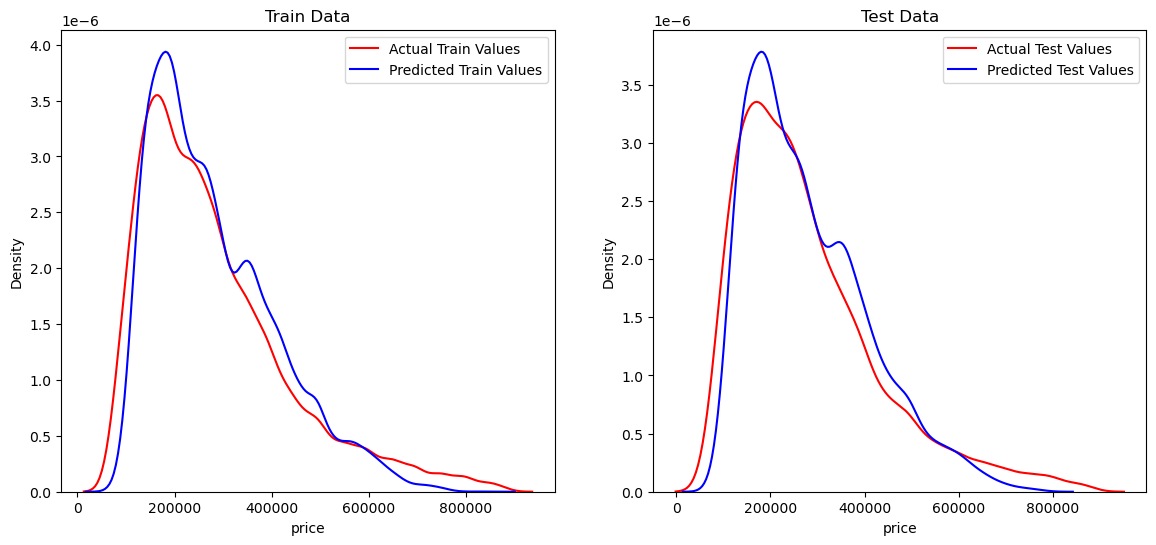

In [39]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(yhat_train, hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)
ax1.set_title('Train Data')
ax1.legend()

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(yhat_test, hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)
ax2.set_title('Test Data')
ax2.legend()

plt.show()

#### 5. Support Vector Machine

In [40]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [41]:
yhat_train = svm_model.predict(X_train_scaled)
yhat_test = svm_model.predict(X_test_scaled)

In [42]:
print('Train dataset R-square:', svm_model.score(X_train_scaled,y_train))
print('Test dataset R-square:', svm_model.score(X_test_scaled,y_test))

Train dataset R-square: 0.1196313375660859
Test dataset R-square: 0.12344376050236072


In [43]:
print('Train dataset MSE:', mean_squared_error(y_train, yhat_train))
print('Test dataset MSE:', mean_squared_error(y_test,yhat_test))
print('Train dataset MAE:', mean_absolute_error(y_train, yhat_train))
print('Test dataset MAE:', mean_absolute_error(y_test,yhat_test))

Train dataset MSE: 20877687740.13326
Test dataset MSE: 20325446340.525726
Train dataset MAE: 103770.64894410194
Test dataset MAE: 102060.1979041877


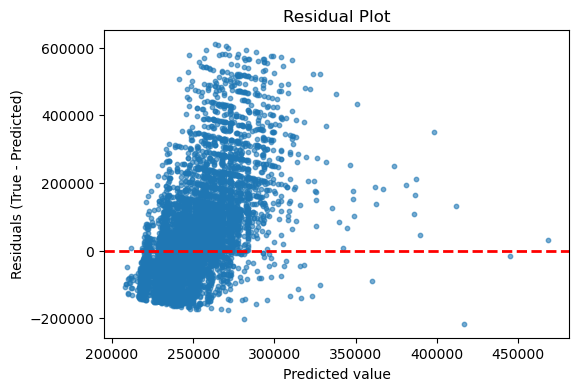

In [44]:
# Calculate residuals
residuals = y_test - yhat_test

# Create a residual plot
plt.figure(figsize=(6, 4))
plt.scatter(yhat_test, residuals, s=10, alpha=0.6)
plt.xlabel('Predicted value')
plt.ylabel('Residuals (True - Predicted)')
plt.axhline(0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')

plt.show()

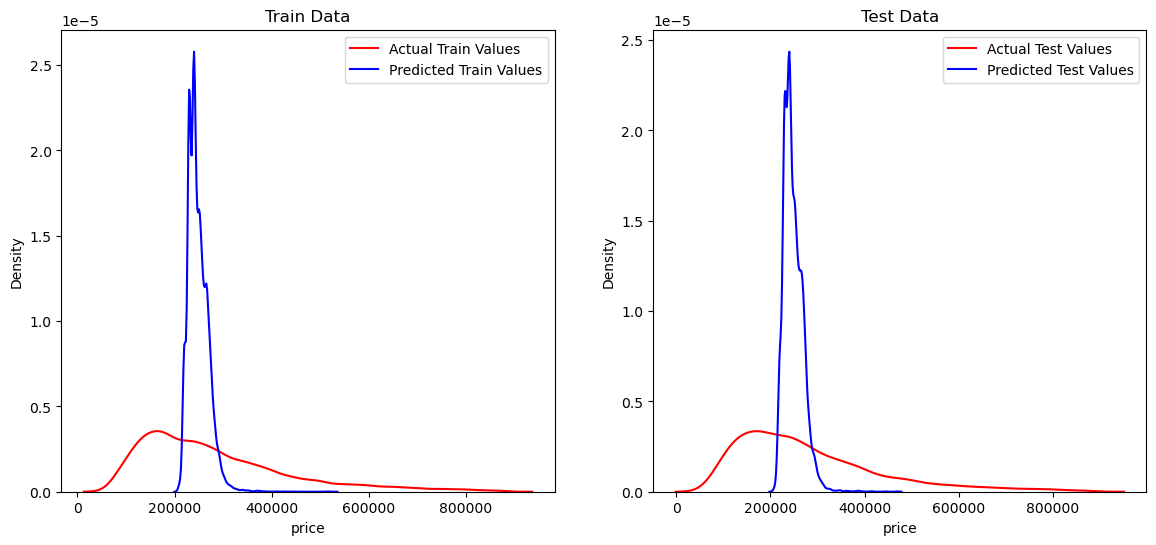

In [45]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(yhat_train, hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)
ax1.set_title('Train Data')
ax1.legend()

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(yhat_test, hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)
ax2.set_title('Test Data')
ax2.legend()

plt.show()